In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

FacetGrid, Seaborn kütüphanesinin çok güçlü bir özelliğidir.

Veriyi alt gruplara bölerek, her bir grup için ayrı grafikler (alt grafikler) çizer.

Yani:

Aynı grafiğin farklı filtrelenmiş halleri birden fazla panelde gösterilir.

📌 Kısaca:
Büyük veri setini alt kategorilere göre parçalayıp görsel olarak karşılaştırma yapmanı sağlar.


In [4]:
data = pd.read_excel('mart_linePlot.xlsx')
data.columns = data.columns.str.lower()


In [5]:
data.head()

,unnamed: 0,item_id,item_w,item_type,item_mrp,outlet_id,outlet_year,outlet_size,outlet_location_type,sales,tier
0,0,FDU32,21.027499,Baking Goods,197.352319,OUT046,2004,Small,Tier 2,2689.457781,2
1,1,NCT54,21.102371,Meat,148.250214,OUT035,1987,Small,Tier 1,3437.350375,1
2,2,FDW08,20.882263,Hard Drinks,205.465010,OUT035,1999,Small,Tier 3,3129.967268,3
3,3,FDJ22,21.050435,Starchy Foods,253.417583,OUT046,1996,Small,Tier 1,1306.514376,1
4,4,FDF47,21.247876,Baking Goods,240.871039,OUT035,1988,Small,Tier 3,1739.769829,3


In [6]:
data.outlet_size.unique()

array(['Small', 'Medium', 'High'], dtype=object)

In [7]:
data.outlet_location_type.unique()

array(['Tier 2', 'Tier 1', 'Tier 3'], dtype=object)

### Her ikisi de FacetGrid içindeki grafik hücrelerine veri çizdirmek için kullanılır

g.map():
🎯 Daha basit ve temel fonksiyonlar için kullanılır.

Sadece tek bir değişken veya x, y gibi birkaç parametre kabul eden fonksiyonları destekler.

Fonksiyona tek tek argüman gönderirsin (x, y, vs.)

sns.histplot, sns.scatterplot, plt.plot gibi grafiklerle çalışır.

g.map_dataframe():
🎯 Daha esnek, modern, ve DataFrame odaklı kullanımdır.

İçine gönderdiğin grafik fonksiyonuna veri çerçevesini (dataframe) doğrudan geçirir.

Daha karmaşık fonksiyonlarda işe yarar: sns.boxplot, sns.lineplot, sns.barplot gibi.

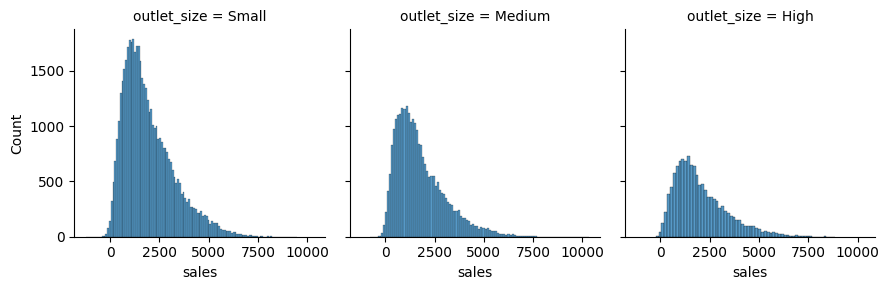

In [8]:
data1 = sns.FacetGrid(data , col='outlet_size')
data1.map_dataframe(sns.histplot , x='sales')
plt.show()

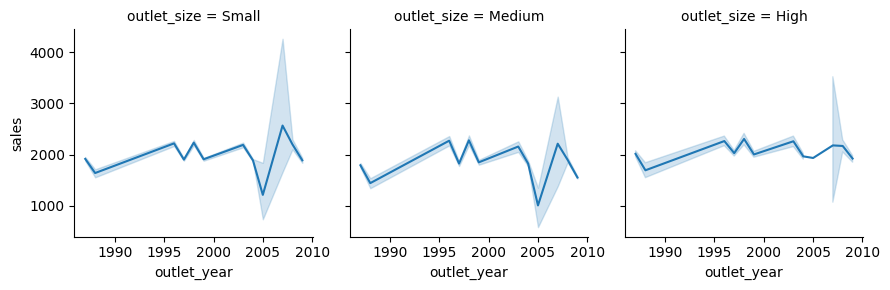

In [9]:
data2 = sns.FacetGrid(data , col='outlet_size')
data2.map_dataframe(sns.lineplot , x='outlet_year' , y='sales' )
plt.show()

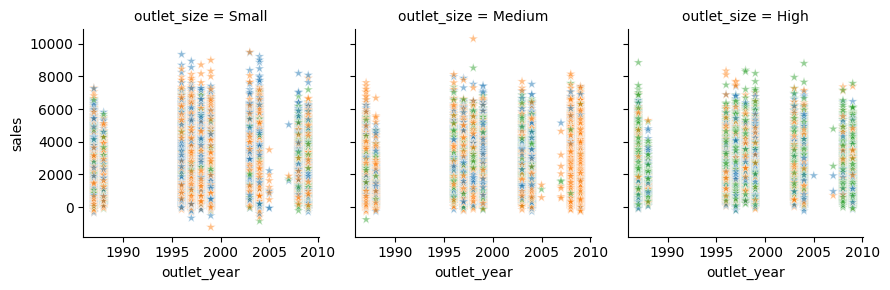

In [11]:
data3 = sns.FacetGrid(data , col='outlet_size')
data3.map_dataframe(sns.scatterplot , x='outlet_year' , y='sales'
                    ,hue='outlet_location_type'
                    ,marker='*'
                    ,alpha=0.5
                    ,color='orange'
                    ,s=50)
plt.show()

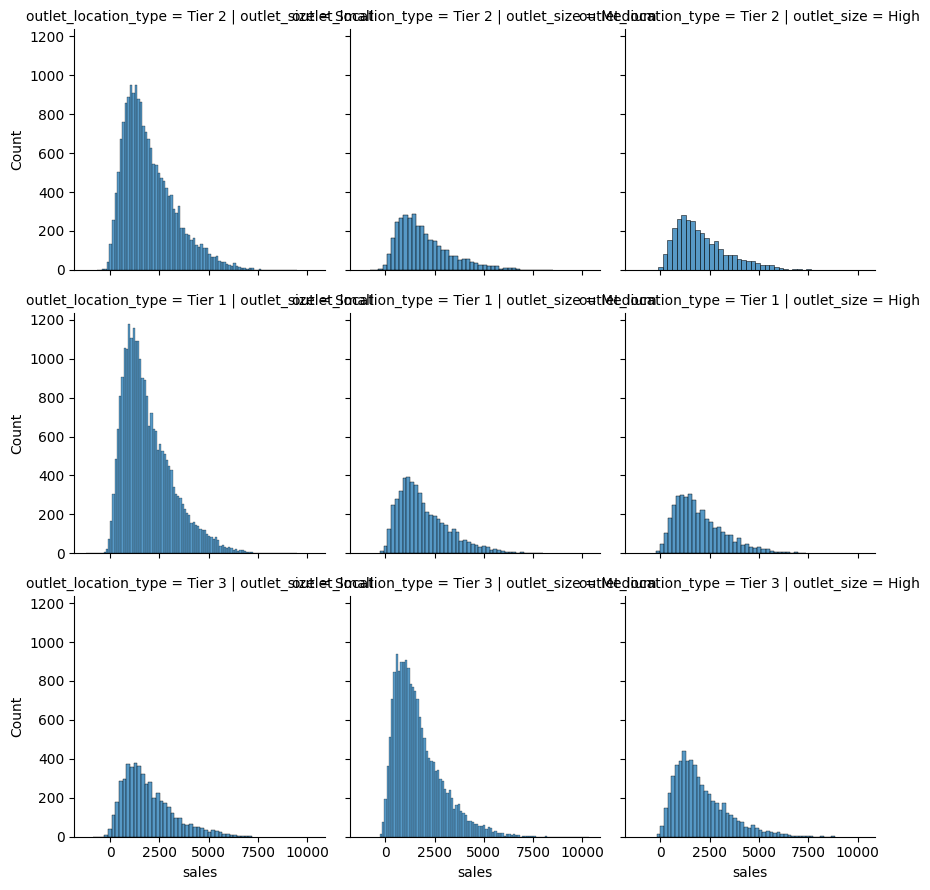

In [12]:
data4 = sns.FacetGrid(data , col='outlet_size' , row='outlet_location_type')
data4.map_dataframe(sns.histplot , x='sales')
plt.show()

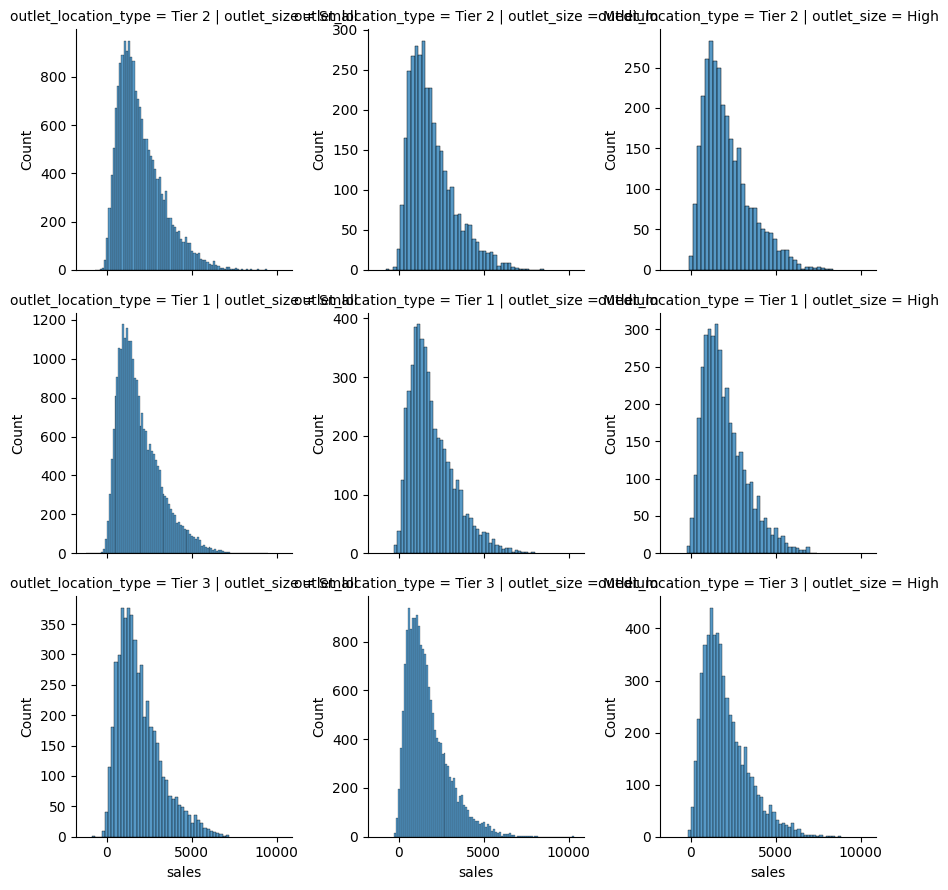

In [16]:
data4 = sns.FacetGrid(data , col='outlet_size' , row='outlet_location_type' 
                      ,sharey=False)
# sharey=False --> Her grafik kendi Y eksenini kendi verisine göre ayarlar.
data4.map_dataframe(sns.histplot , x='sales')
plt.show()

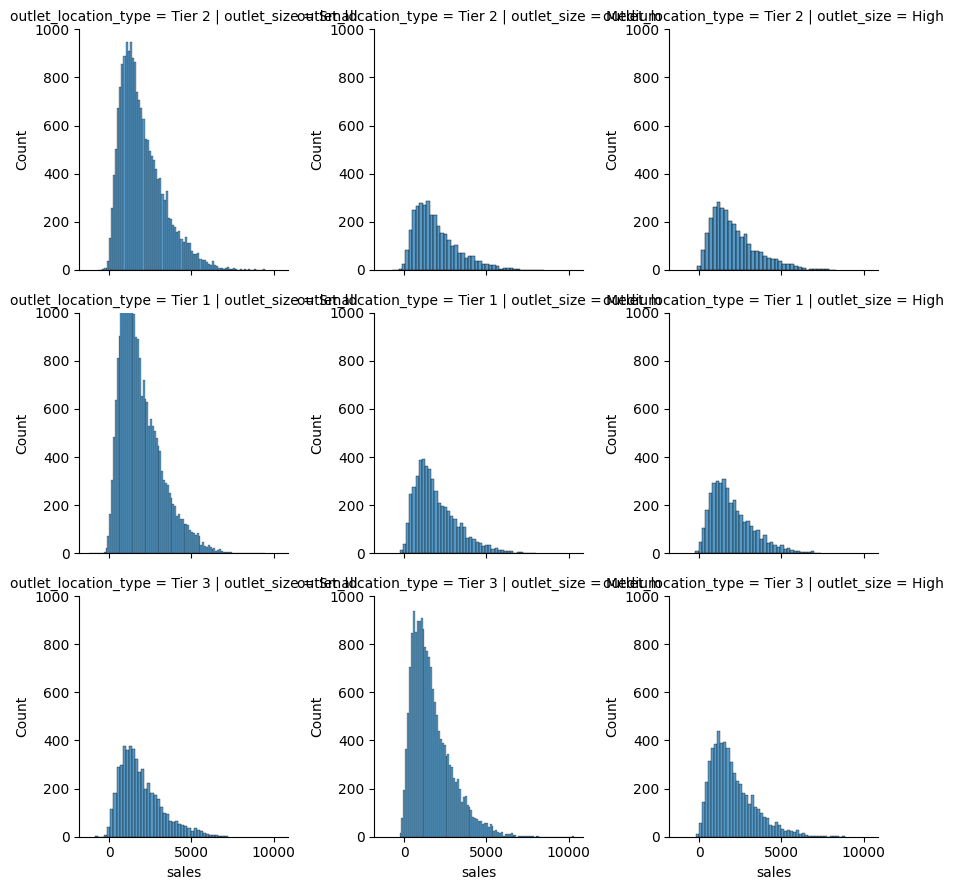

In [17]:
data4 = sns.FacetGrid(data , col='outlet_size' , row='outlet_location_type'
                      ,sharey=False
                      ,ylim=(0,1000))
data4.map_dataframe(sns.histplot , x='sales')
plt.show()

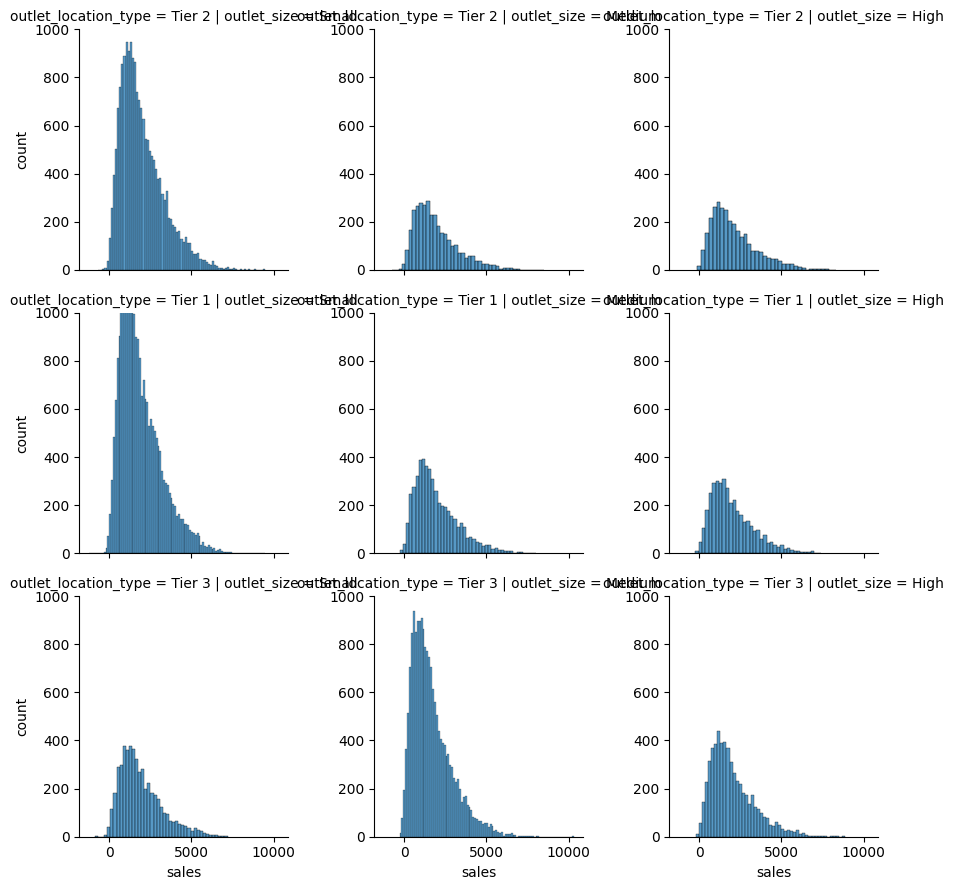

In [19]:
data4 = sns.FacetGrid(data , col='outlet_size' , row='outlet_location_type'
                      ,sharey=False
                      ,ylim=(0,1000))
data4.map_dataframe(sns.histplot , x='sales')
data4.set_axis_labels('sales' , 'count')
# set_axis_labels(x_label, y_label) --> Tüm alt grafiklerde ortak olan X ve Y eksenlerine başlık (etiket) verir.
plt.show()

In [25]:
data.outlet_size.unique()

array(['Small', 'Medium', 'High'], dtype=object)

| Parametre                    | Açıklama                                                                 |
| ---------------------------- | ------------------------------------------------------------------------ |
| `col_template='{col_name}'`  | Sadece sütun başlığındaki **kategori adını (örneğin "Small")** yazdırır  |
| `row_template='{row_name}'`  | Sadece satır başlığındaki **kategori adını (örneğin "Tier 1")** yazdırır |
| `{col_var}` veya `{row_var}` | Değişkenin adını yazar (örneğin "outlet\_size")                          |


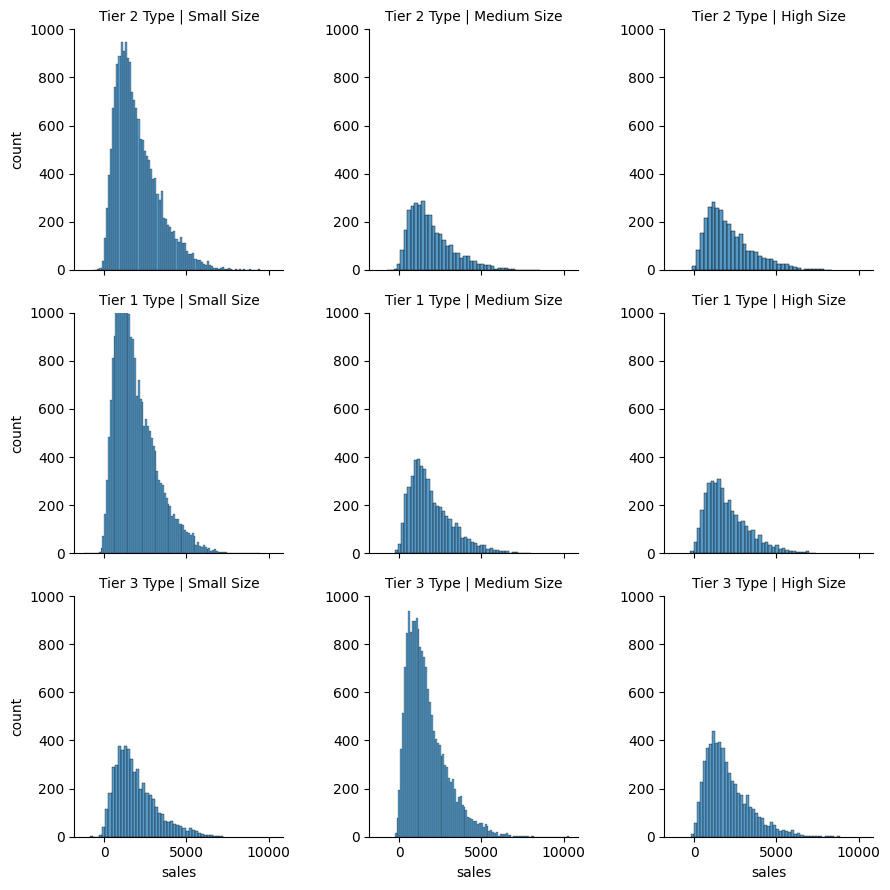

In [28]:
data4 = sns.FacetGrid(data , col='outlet_size' , row='outlet_location_type'
                      ,sharey=False
                      ,ylim=(0,1000))
data4.map_dataframe(sns.histplot , x='sales')
data4.set_axis_labels('sales' , 'count')
data4.set_titles(col_template='{col_name} Size' , row_template='{row_name} Type')
# set_axis_labels(x_label, y_label) --> Tüm alt grafiklerde ortak olan X ve Y eksenlerine başlık (etiket) verir.
plt.show()

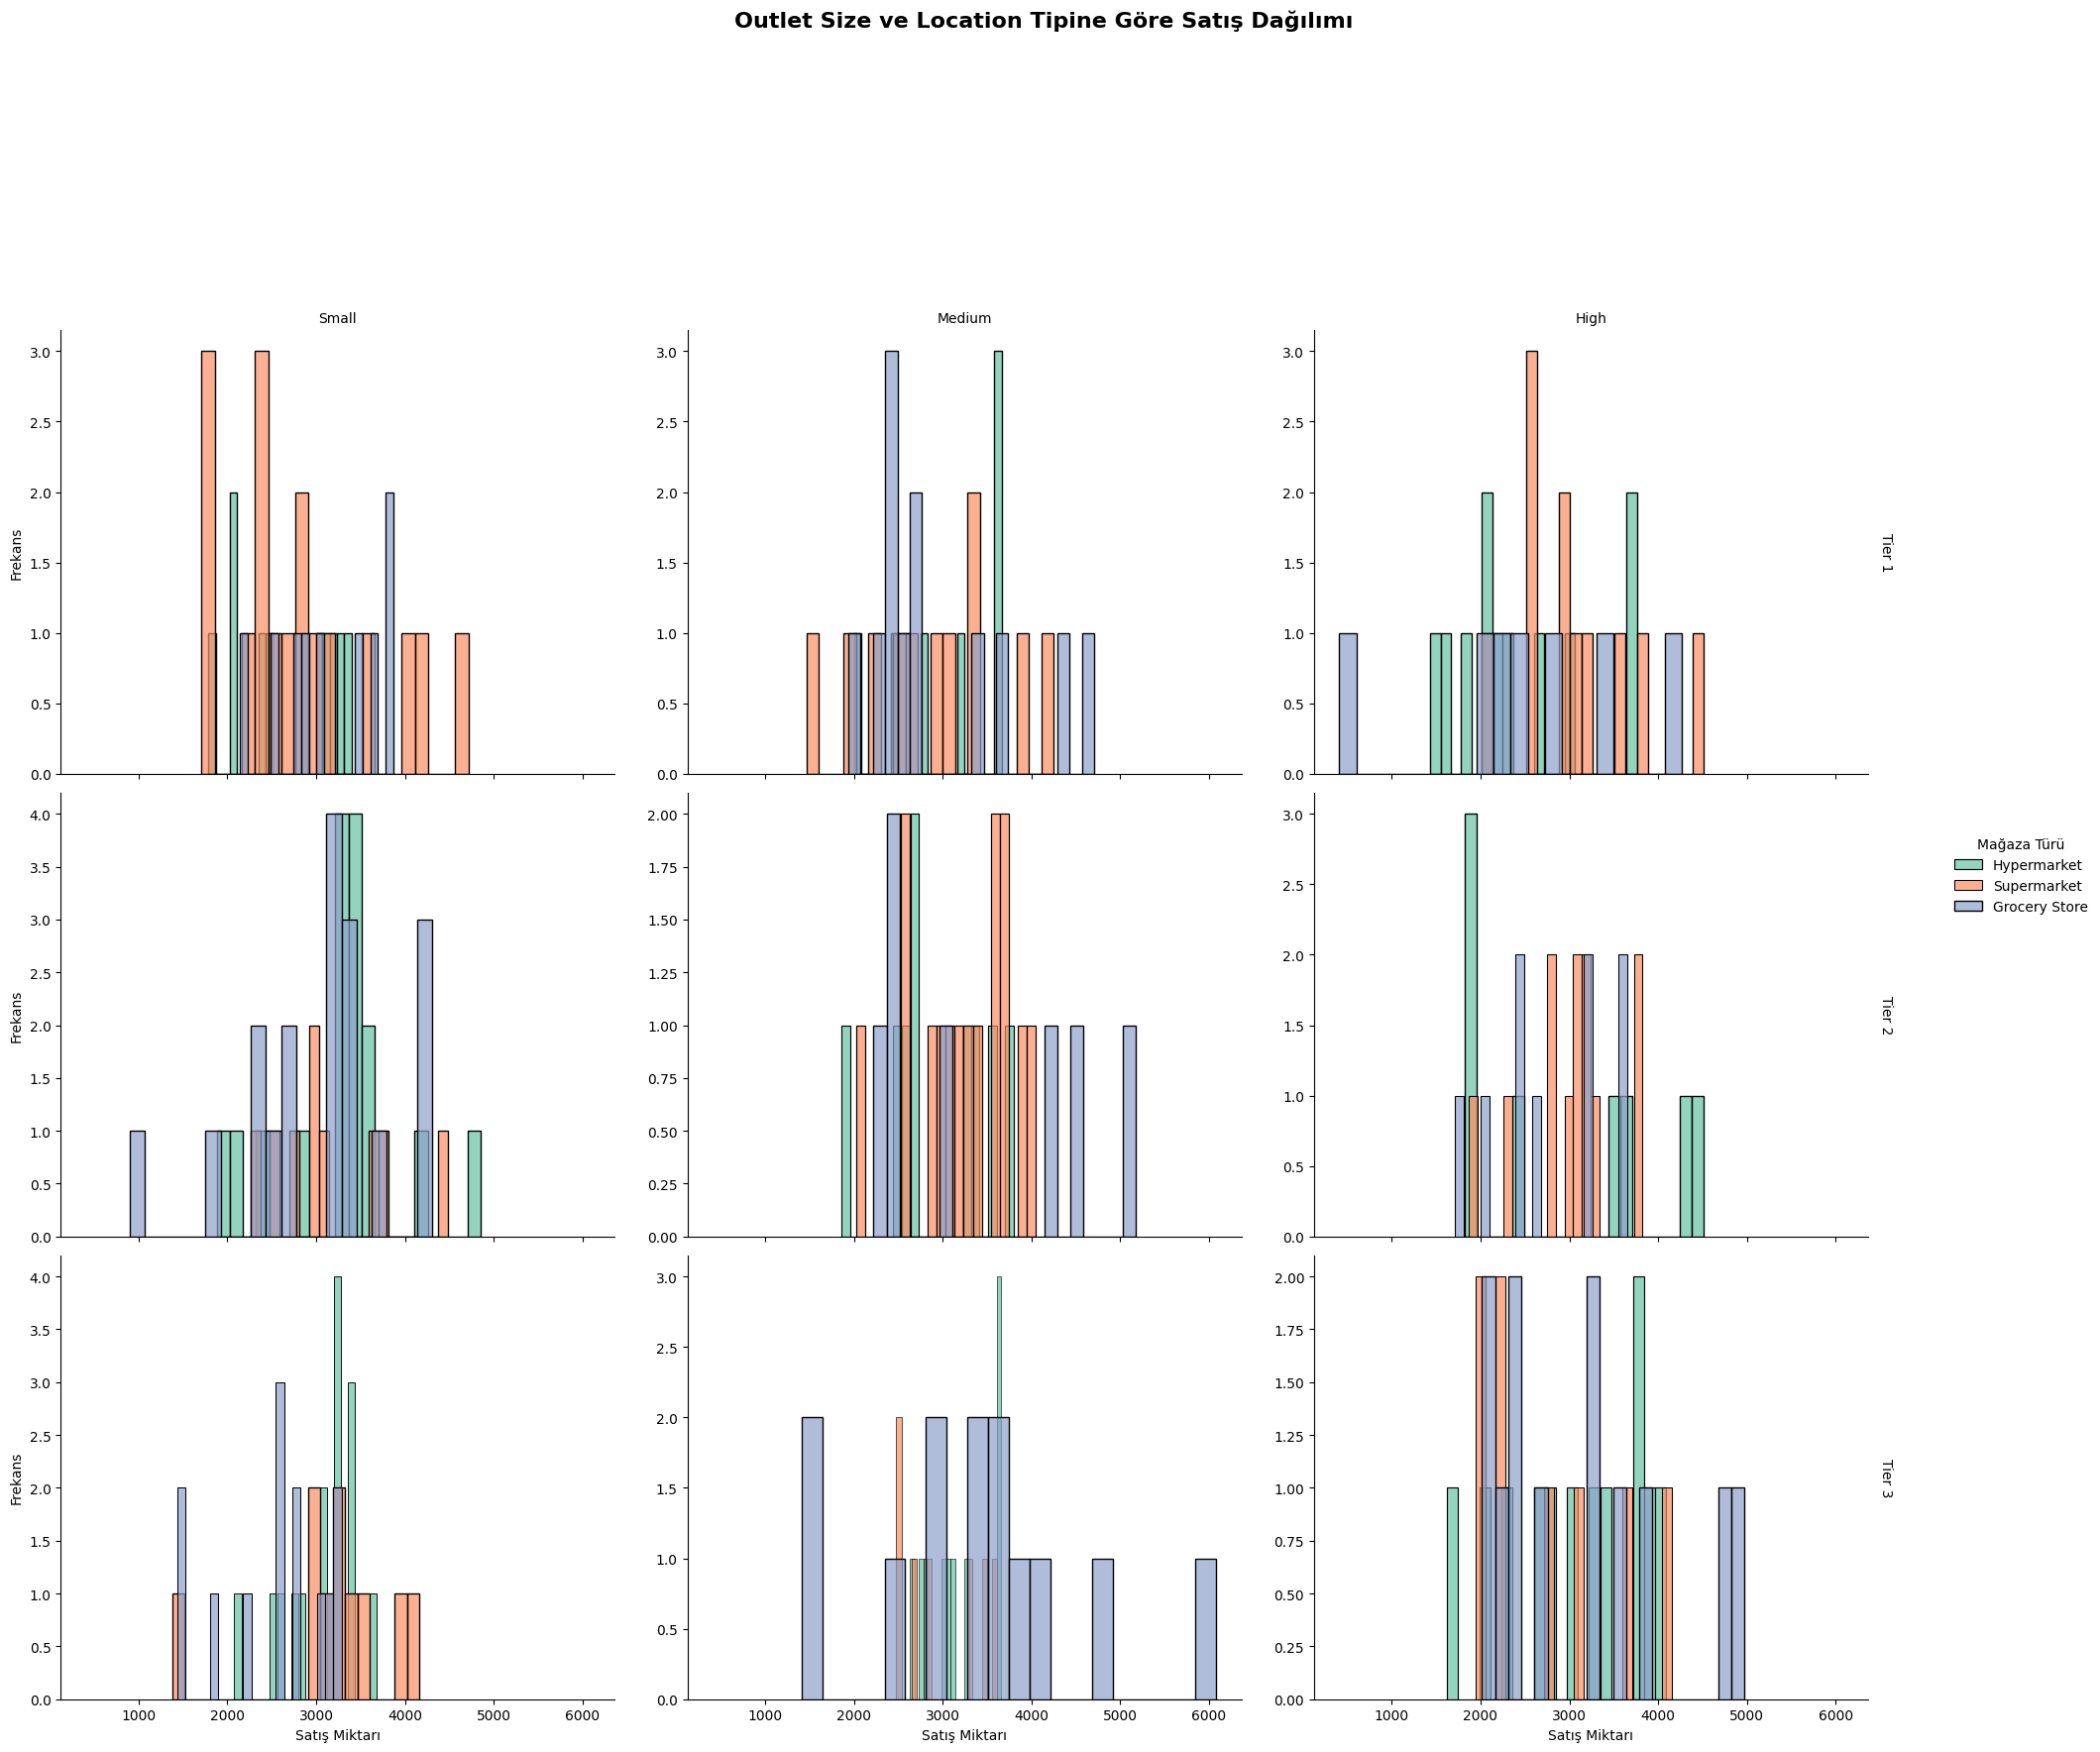

In [ ]:
g = sns.FacetGrid(
    data=data,                          #  Veri çerçevesi
    col='outlet_size',                  # Sütunlara göre gruplama
    row='outlet_location_type',         # Satırlara göre gruplama
    hue='outlet_type',                  # Renklerle gruplama 
    sharey=False,                       # Y eksenleri bağımsız 
    palette='Set2',                     # Renk teması 
    height=6,                           # Grafik boyutu
    aspect=1.1,                         # En-boy oranı 
    margin_titles=True                  # Başlıkları kenara al 
)

# Gelişmiş fonksiyonla çizim (veri DataFrame olarak geçiyor)
g.map_dataframe(sns.histplot, x='sales', bins=20, alpha=0.7)

# Eksen etiketleri 
g.set_axis_labels("Satış Miktarı", "Frekans")

# Başlıkları sadeleştir 
g.set_titles(col_template="{col_name}", row_template="{row_name}")

# Renkli gruplar için açıklama 
g.add_legend(title='Mağaza Türü')

plt.subplots_adjust(top=0.8)
plt.suptitle("Outlet Size ve Location Tipine Göre Satış Dağılımı", fontsize=16, weight='bold')
plt.show()


In [42]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


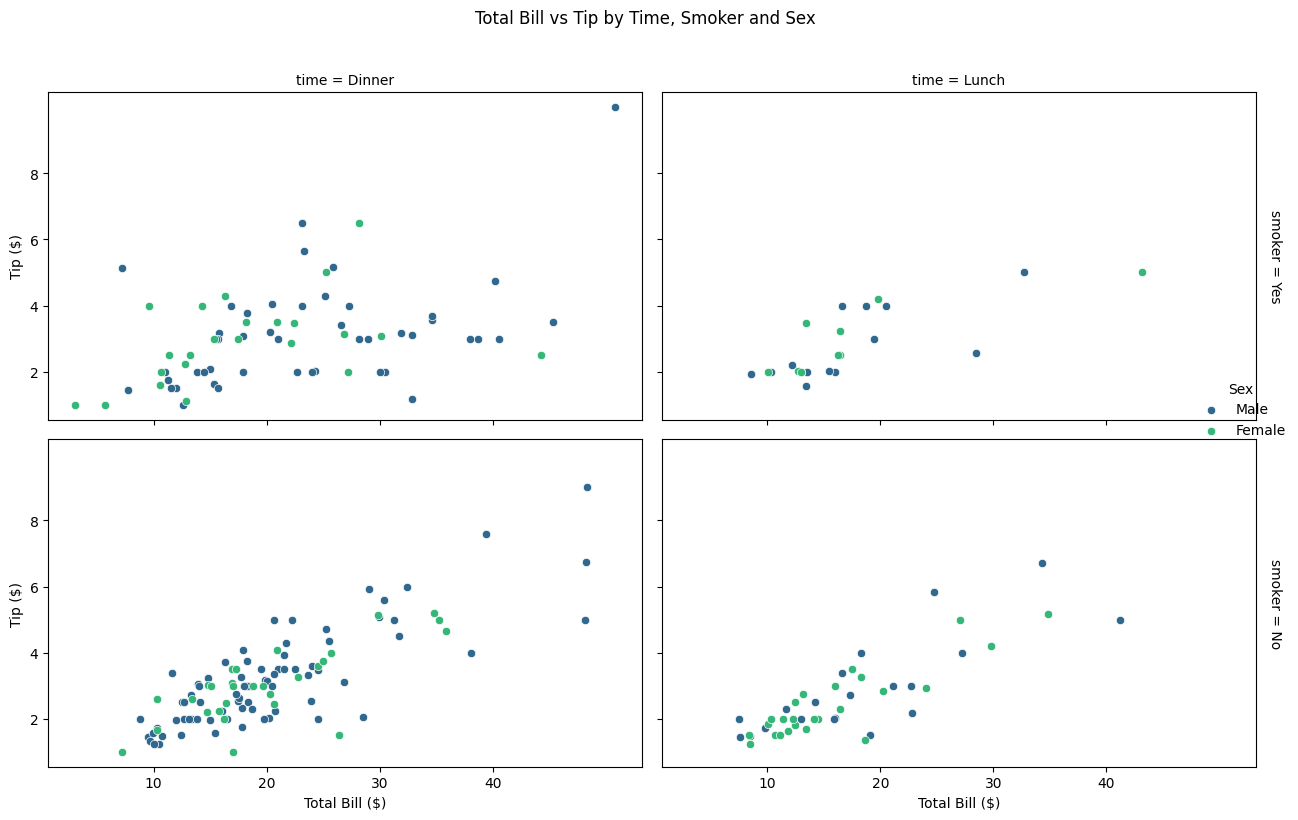

In [41]:
# Örnek veri yükleme (seaborn'dan built-in bir dataset)
tips = sns.load_dataset("tips")

# FacetGrid oluşturma
g = sns.FacetGrid(
    data=tips,                   # data: Kullanılacak veri çerçevesi
    col="time",                  # col: Sütunlara bölmek için değişken
    row="smoker",                # row: Satırlara bölmek için değişken
    hue="sex",                   # hue: Renklerle ayırmak için değişken
    height=4,                    # height: Her bir subplot'un yüksekliği (inch)
    aspect=1.5,                  # aspect: En/boy oranı
    palette="viridis",           # palette: Renk paleti
    col_order=["Dinner", "Lunch"], # col_order: Sütun sıralaması
    row_order=["Yes", "No"],      # row_order: Satır sıralaması
    margin_titles=True,          # margin_titles: Marj başlıklarını göster
    despine=False                # despine: Grafik kenarlıklarını kaldırma
)

# Grafikleri çizme (örneğin scatter plot)
g.map(sns.scatterplot, "total_bill", "tip")

# Eksen paylaşımını ayarla (sharex/sharey False olduğu için her subplot kendi ölçeğinde)
g.set(xticks=[10, 20, 30, 40], yticks=[2, 4, 6, 8])

# Başlık ve eksen etiketleri ekle
g.fig.suptitle("Total Bill vs Tip by Time, Smoker and Sex", y=1.02)
g.set_axis_labels("Total Bill ($)", "Tip ($)")

# Legend'ı göster
g.add_legend(title="Sex")

plt.tight_layout()
plt.show()